In [26]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Executive Summary

Executive Summary:

This analysis studies the relationship between two continuous variables which are GDP per capita and Happiness index. The data comes from a total of 129 countries, and it revealed that there is a moderate positive correlation of 0.73 between both variables. This tells us that when GDP per capita increases, it's likely that Happiness Index will increase as well.

Using a simple linear regression model, we found out that GDP per capita can interpret about 59% of the variability in Happiness Index scores. This shows the significance of economic growth (GDP per capita) in encouraging overall happiness. However, we must consider other factors as well.

The outliers in this analysis tell us that there are certain countries that have Happiness Index scores that have little to no significance from the GDP per capita of the country. This suggests that there can be multiple factors that influence happiness.  

Conclusions:

GDP per capita and Happiness Index scores have a significant positive relationship.

GDP per capita is a significant factor. However, it isn’t the main cause of happiness.

Other variables and factors must be looked at to make a more valid claim.

Recommendations:  

More research must be conducted to further study the factors that influence happiness. Settling on a single variable/factor is not enough.

# Introduction

Hypothesis: “The higher a country’s GDP per capita, the higher is the Happiness index”.

The purpose of this report is to identify if there is a relationship between a country’s GDP per capita and its happiness index. To do this, we will combine the happiness index dataset with the GDP per capita dataset and run descriptive analysis (such as summary statistics and exploratory data analysis) and statistical analysis (hypothesis testing using correlation and simple linear regression) to come up with key findings and insights that support or refute the hypothesis.  

The importance of understanding the relationship between GDP per capita and the happiness index can guide governments and policymakers to identify where they lack in terms of encouraging better quality of life for the residents of the country which would lead to an increasing GDP per capita if there is a strong relationship between the GDP per capita and the happiness index. For LEDC’s, this report can show how achieving economic growth is an outcome that is yielded from the society’s happiness. Different nations can learn from each other by comparing and implementing their practices that result in happier residents.

# Dataset Overview

Description of Datasets

Dataset 1 (Happiness Index): 2 columns/variables. Country name and score. 137 countries. The happiness index is scored on a 10-point scale.

Dataset 2 (GDP per capita): 3 columns. Country name, GDP per capita, and ISO-code. “ISO-code” column is not relevant. 191 countries.

Merging the datasets cancels out a number of countries due to them not being present in both datasets. There are 129 countries that appear in both datasets. So, this report will analyze these 129 countries using the Dataframe: df.

In [27]:
# Data Preprocessing Steps

# Upload Datasets
from google.colab import drive
drive.mount('/content/drive')

happiness_index = pd.read_excel('/content/drive/My Drive/ban/WHR2023_Data-1.xlsx')
gdp_per_capita = pd.read_excel('/content/drive/My Drive/ban/GDP per capita.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
 # DataFrame for Happiness Index
df_hpi = pd.DataFrame(happiness_index)

# DataFrame for GDP per capita
df_gdp = pd.DataFrame(gdp_per_capita)

In [29]:
# Merging DataFrames
df = pd.merge(df_hpi, df_gdp, left_on='Country name', right_on='Country')

In [30]:
df.head()

,Country name,Happiness Index,Country,GDP per capita,ISO-code
0,Finland,7.8042,Finland,49548.0,FIN
1,Denmark,7.5864,Denmark,55675.0,DNK
2,Iceland,7.5296,Iceland,56974.0,ISL
3,Israel,7.4729,Israel,40337.0,ISR
4,Netherlands,7.4030,Netherlands,60299.0,NLD


In [31]:
df.tail()

,Country name,Happiness Index,Country,GDP per capita,ISO-code
124,Botswana,3.4353,Botswana,19388.0,BWA
125,Zimbabwe,3.2035,Zimbabwe,2778.0,ZWE
126,Sierra Leone,3.1376,Sierra Leone,1765.0,SLE
127,Lebanon,2.3922,Lebanon,15599.0,LBN
128,Afghanistan,1.8590,Afghanistan,2182.0,AFG


In [32]:
# Checking for missing values or inconsistent data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     129 non-null    object 
 1   Happiness Index  129 non-null    float64
 2   Country          129 non-null    object 
 3   GDP per capita   129 non-null    float64
 4   ISO-code         129 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.2+ KB


In [33]:
df.isnull().sum()

,0
Country name,0
Happiness Index,0
Country,0
GDP per capita,0
ISO-code,0


In [34]:
df.isna().sum()

,0
Country name,0
Happiness Index,0
Country,0
GDP per capita,0
ISO-code,0


In [35]:
df.duplicated().sum()

0

# Methods and Analysis

In [36]:
# Descriptive Analysis
# Summary Statistics
df.describe()

,Happiness Index,GDP per capita
count,129.000000,129.000000
mean,5.555709,23950.085271
std,1.135741,22528.623640
min,1.859000,1152.000000
25%,4.855100,6016.000000
50%,5.702700,16055.000000
75%,6.329500,37606.000000
max,7.804200,112045.000000


Mean: Average happiness index score is 5.55. Average GDP per capita is 23950.

Median: The median for the Happiness Index is 5.70. The median for GDP per capita is 16055.

Standard Deviation: The standard deviation for Happiness Index is 1.13. The standard deviation for GDP per capita is 22528.

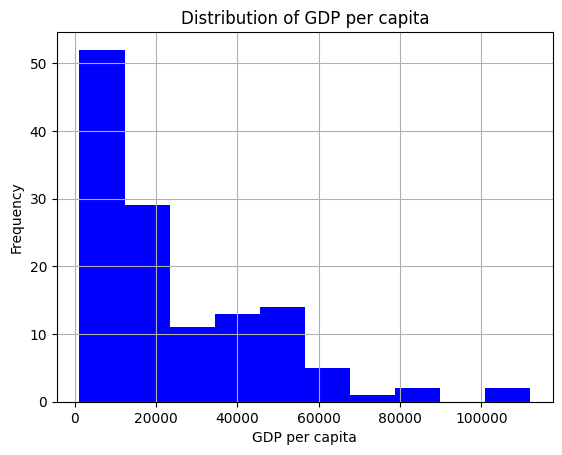

In [37]:
# Exploratory Data Analysis: Univariate
# Histograms
df['GDP per capita'].hist(color='blue')
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.title('Distribution of GDP per capita')
plt.show()

GDP per capita: Right-skewed distribution (positively skewed). The majority of the data points are on the left tail. This is where the countries with lower GDP per capita are. The right tail is where the countries with significantly higher GDP per capita are.

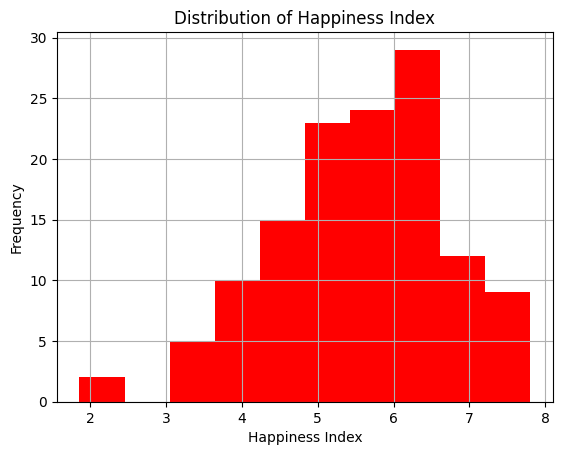

In [38]:
df['Happiness Index'].hist(color='red')
plt.xlabel('Happiness Index')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Index')
plt.show()

Happiness Index: The distribution is normal; however, it can also be left-skewed. This shows that many of the countries have either a medium or high happiness index score, with less countries having low happiness scores.

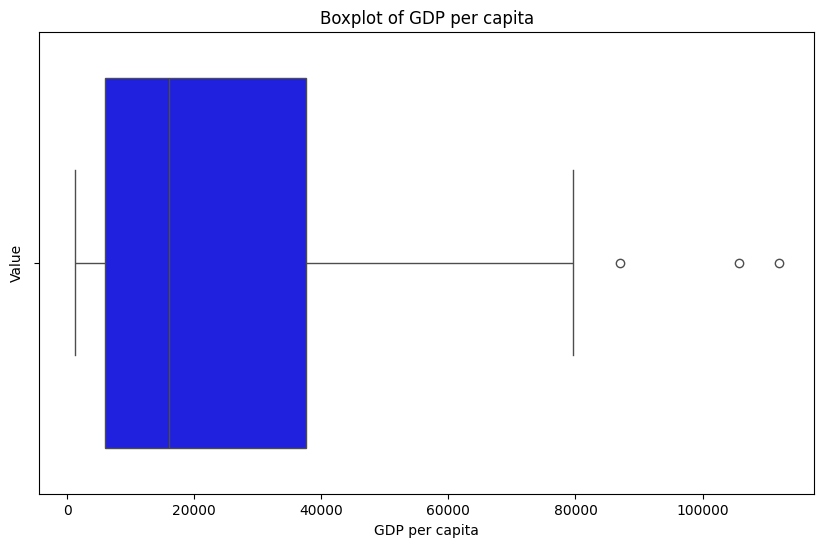

In [39]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GDP per capita', color='blue')
plt.xlabel('GDP per capita')
plt.ylabel('Value')
plt.title('Boxplot of GDP per capita')
plt.show()

GDP per capita: Most of the data points are skewed towards the lower values. Most of the values are within Q1 and Q3. The outliers are countries with significantly higher GDP per capita values compared to others.

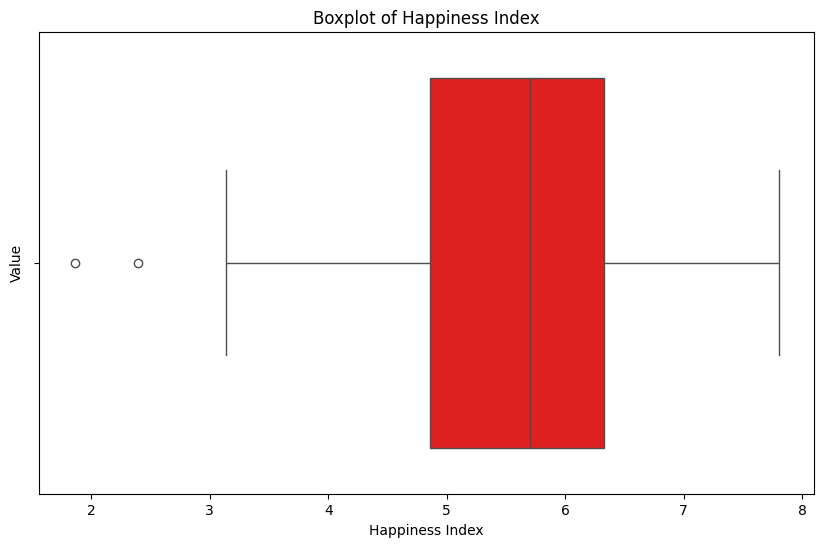

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Happiness Index', color='red')
plt.xlabel('Happiness Index')
plt.ylabel('Value')
plt.title('Boxplot of Happiness Index')
plt.show()

Happiness Index: The boxplot is somewhat left skewed. The lower part of the distribution is more spread out than the upper part. There are some outliers beneath the lower whisker meaning that there are certain countries with significantly lower happiness index scores compared to the rest.

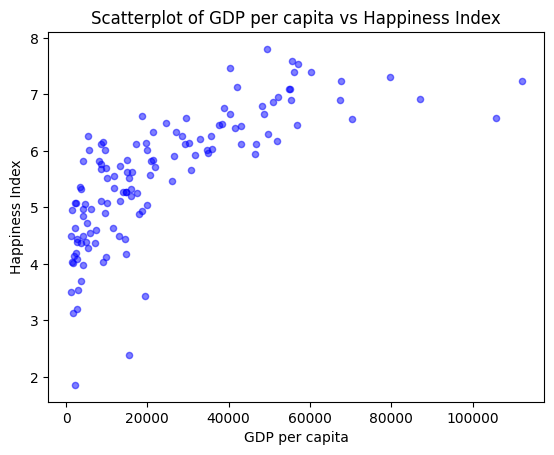

In [41]:
# Exploratory Data Analysis: Bivariate
# Scatterplots
df.plot.scatter(x='GDP per capita', y='Happiness Index', color='blue', alpha=0.5)
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Index')
plt.title('Scatterplot of GDP per capita vs Happiness Index')
plt.show()

There is a positive correlation in the trend between GDP per capita and Happiness Index. Both variables tend to increase simultaneously. The relationship isn’t entirely linear as the points are somewhat scattered. There are a few outliers which are showing that they have a higher GDP per capita but a lower Happiness Index.

In [42]:
# Correlation Matrix
corr = df['GDP per capita'].corr(df['Happiness Index'])
print('Correlation coefficient:', corr)
corr

Correlation coefficient: 0.7380571069823961


0.7380571069823961

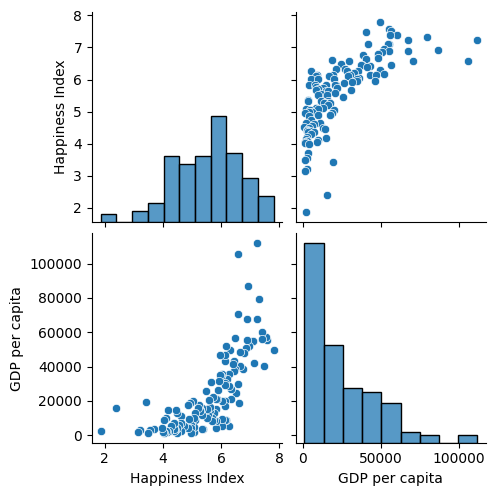

In [43]:
# Pairplot
sns.pairplot(df)
plt.show()

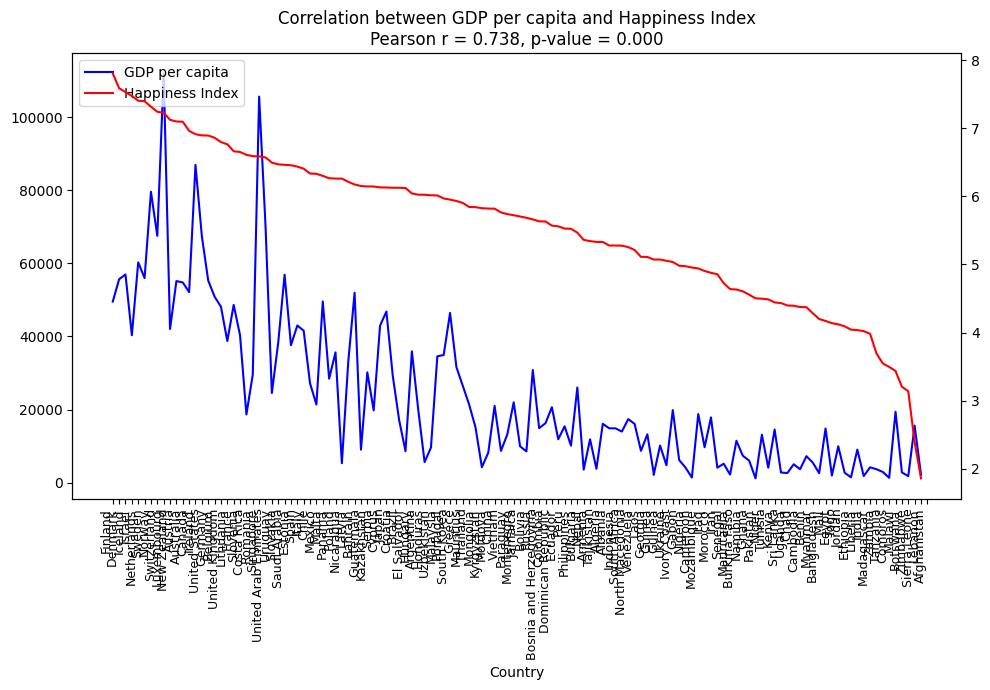

In [44]:
# Statistical Analysis
# Correlation Analysis
correlation, p_value = stats.pearsonr(df['GDP per capita'], df['Happiness Index'])

# Create visualization
plt.figure(figsize=(10, 7))

ax1 = plt.gca()
ax2 = ax1.twinx()

x_axis = df['Country name']

line1 = ax1.plot(x_axis, df['GDP per capita'], 'b-', label='GDP per capita')
line2 = ax2.plot(x_axis, df['Happiness Index'], 'r-', label='Happiness Index')

ax1.set_xlabel('Country')
ax1.set_xticks(range(len(x_axis)))
ax1.set_xticklabels(x_axis, rotation=90, ha='right', fontsize=9)

plt.title(f'Correlation between GDP per capita and Happiness Index\nPearson r = {correlation:.3f}, p-value = {p_value:.3f}')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

Moderate correlation. As GDP per capita increases/decreases, the Happiness Index also increases/decreases showing a significant relationship between both variables.

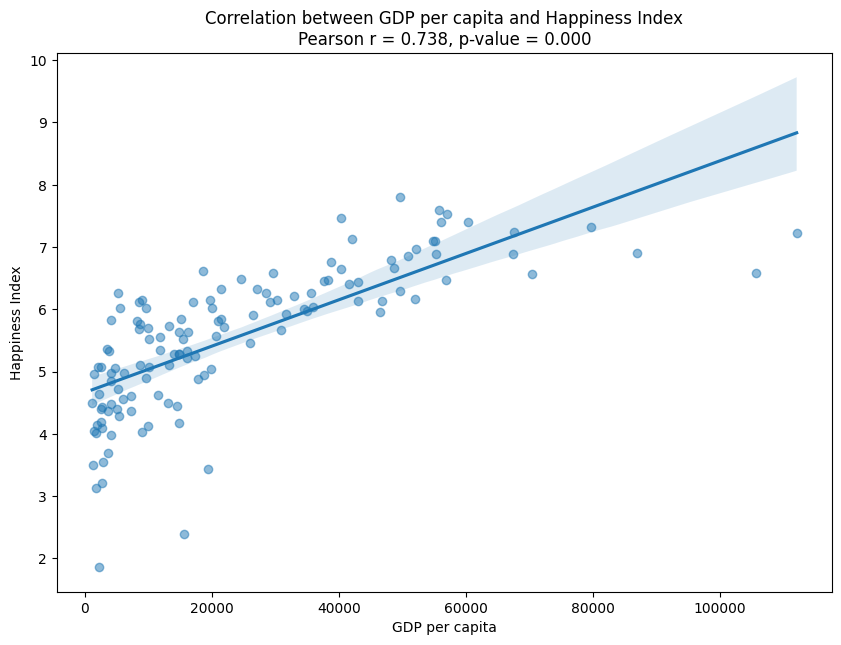

In [45]:
# Scatter plot with trend line
plt.figure(figsize=(10, 7))
sns.regplot(x='GDP per capita', y='Happiness Index', data=df, scatter_kws={'alpha':0.5})

plt.title(f'Correlation between GDP per capita and Happiness Index\nPearson r = {correlation:.3f}, p-value = {p_value:.3f}')

plt.show()

The line of best fit shows that the relationship between both of the variables is reasonably approximated.  

In [46]:
# Simple Linear Regression Analysis
X = df['GDP per capita']
y = df['Happiness Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train_reshaped, y_train)

print('Intercept value:',model.intercept_)
print('Coefficient value:',model.coef_)

y_pred = model.predict(X_test_reshaped)

mse = mean_squared_error(y_pred, y_test)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Intercept value: 4.680326190807178
Coefficient value: [3.59441953e-05]
Mean Squared Error: 0.4284520159777444
R-squared: 0.5906957495380566


An R squared value of 0.59 means that 59% of the variability in the Happiness Index can relate and be interpreted by the GDP per capita. This shows a moderate relationship between GDP per capita and the Happiness Index.

In [47]:
# Variance Analysis
gdp_variance = df['GDP per capita'].var()
happiness_variance = df['Happiness Index'].var()

print(f"Variance of GDP per capita: {gdp_variance}")
print(f"Variance of Happiness Index: {happiness_variance}")


Variance of GDP per capita: 507538883.12548465
Variance of Happiness Index: 1.2899068178549886


In [48]:
mse = 0.428  # Mean Squared Error
variance = 1.28  # Variance of the Happiness Index

# Proportion of error
proportion_of_error = mse / variance
print("Proportion of Error:", proportion_of_error)

Proportion of Error: 0.334375


Comparing the MSE with the variance of the Happiness Index, we can see that the proportion of error equals to 33.4% of the total variance in the Happiness Index meaning that the model is performing well, however, it still needs to improve.

In [49]:
# Standard Deviation Calculations
gdp_stddev = df['GDP per capita'].std()
happiness_stddev = df['Happiness Index'].std()

print(f"Standard Deviation of GDP per capita: {gdp_stddev}")
print(f"Standard Deviation of Happiness Index: {happiness_stddev}")


Standard Deviation of GDP per capita: 22528.623640282258
Standard Deviation of Happiness Index: 1.135740647267231


In [50]:
# Probability Assessment
# Probability of Happiness Index > 6 given GDP > 25,000
high_gdp = df[df['GDP per capita'] > 25000]
probability = (high_gdp['Happiness Index'] > 6).mean()

print(f"Probability of Happiness Index > 6 given GDP > 25,000: {probability:.2f}")


Probability of Happiness Index > 6 given GDP > 25,000: 0.87


A higher probability (75% or above) is suggesting that high GDP per capita countries are more likely to have a high Happiness Index while a lower probability (30% or less) is suggesting that having a high GDP per capita isn’t enough to have a high Happiness Index.

# Results and Discussion

Main Findings:

There is a moderate (almost strong) positive correlation (r = 0.73)

As GDP per capita increases the Happiness Index does too.

The R – squared value of 0.59 that was yielded from the simple linear regression model that tells us that 59% of the variability within the Happiness Index can be interpreted by GDP per capita.  

GDP is significant but isn’t the main influence on the Happiness index scores.

There are outliers that show us that countries with low GDP per capita have a relatively high Happiness Index score and vice-versa as well. The outliers tell us that there are other factors that can influence the Happiness Index scores other than GDP per capita.

GDP per capita has a right-skewed distribution meaning that most of the countries have lower GDP per capita while only a few of them have a significantly higher GDP per capita.

The Happiness Index has a normal distribution but has subtle implications of it being left-skewed as well. This means that most of the countries have a medium to high Happiness Index score.

Further discussion and implications:

Regarding the findings, it could be fair to say that economic growth (GDP per capita) is positively linked to increased happiness within a country ​but it​'s ​important to​ acknowledge ​that there are other factors that come into play as​ well.

The findings from this report can be used by governments and policymakers to encourage economic growth which can improve happiness and well-being across the country.

The outliers tell us that there are implicit social and cultural factors that play a role in encouraging happiness scores in certain countries while in most countries, typical social norms play the key role in influencing happiness scores.

This analysis limits itself by relying on the correlation between GDP per capita and Happiness Index. Correlation does not imply causation. There are also other factors and variables that should be included as well to make a valid and firm claim.

It's important to note that once the two datasets were merged, there was only 129 countries that were able to be used in this analysis. The rest were deleted due to certain countries not being present in both datasets. If there were more countries to analyze, there could’ve been a different outcome.

Use of statistical tools:

To test the hypothesis, I used Pearson Correlation and simple linear regression.

The correlation analysis was used to measure the correlation direction and strength of the relationship between GDP per capita and the Happiness Index.  

Simple linear regression was used to make a model with the independent variable (GDP per capita) and the dependent variable (Happiness Index).

This model will identify the importance of GDP per capita on Happiness Index to test the hypothesis.

The use of a t-test cannot test the relationship between these two continuous variables.  

Using  one-way ANOVA could have been possible if I had categorized either of my variables into groups. However, if I had done that, I could have been at risk of losing information and context by categorizing either one of the variables.

To conduct a variance analysis, I computed the variance of GDP per capita and Happiness Index into python (colab) to identify their variability which was then used to find the proportion of error.

A simple probability assessment was also included to estimate the chances of a country reporting a high Happiness Index within a given GDP per capita range.

# Conclusion

This report analyzed an independent variable (GDP per capita) and a dependent variable (Happiness Index) to see if there was a relationship between them. After concluding the analysis, we see a moderate positive correlation of 0.73 meaning that it is likely that countries with higher GDP per capita usually have a higher Happiness Index score.

With the implementation of a linear regression model, we discovered that GDP per capita explains about 59% of the variability in the Happiness Index. This tells us that GDP per capita is a significant variable for encouraging overall happiness however, it isn’t the cause of it (there are multiple factors).  

Although there is a positive correlation, there were outliers in this analysis meaning that there are several factors that impact the Happiness Index scores across the world, and in some countries, GDP per capita isn’t as significant of a factor compared to most of the countries.

In conclusion, the findings from this analysis can be used as an example to suggest that economic growth can be positevly linked to happiness within a nation. However, we must always remember that correlation does NOT imply causation meaning that it's important to consider other factors that potentially play a role in encouraging happiness.

So, we would FAIL TO REJECT the hypothesis: “The higher a country’s GDP per capita, the higher is the Happiness Index”.

# References

References

Vissapragada, A. (2024). Introduction to BUSINESS ANALYTICS and REGRESSION (1st ed., Vol. 1, p. 240). Kendall Hunt Publishing. https://bookshelf.vitalsource.com/reader/books/9798765797341 (Original work published 2024)

World Happiness Report. (2024). World Happiness Report. Worldhappiness.report. https://worldhappiness.report/